# Bitcoin price Prediction using LSTM

# Importing Library

In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Loading Dataset

In [2]:
df=pd.read_csv('Data/BTC_USD1_cleaned.csv',delimiter=',')

In [3]:
print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

Total number of days present in the dataset:  3940
Total number of fields present in the dataset:  7


In [4]:
df.shape

(3940, 7)

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj_Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,398.821014


In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj_Close
3935,2025-06-26,107375.070312,108305.546875,106666.351562,106960.000000,43891990613,106960.000000
3936,2025-06-27,106954.921875,107772.468750,106449.992188,107088.429688,45353692675,107088.429688
3937,2025-06-28,107090.546875,107567.882812,106883.976562,107327.703125,30037708335,107327.703125
3938,2025-06-29,107327.820312,108526.304688,107230.109375,108385.570312,35534874438,108385.570312
3939,2025-06-30,108380.781250,108786.710938,106794.960938,107777.492188,41317273600,107777.492188


In [7]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3940 non-null   object 
 1   Open       3940 non-null   float64
 2   High       3940 non-null   float64
 3   Low        3940 non-null   float64
 4   Close      3940 non-null   float64
 5   Volume     3940 non-null   int64  
 6   Adj_Close  3940 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 215.6+ KB


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj_Close'], dtype='object')

In [8]:
df.describe()

,Open,High,Low,Close,Volume,Adj_Close
count,3940.000000,3940.000000,3940.000000,3940.000000,3.940000e+03,3940.000000
mean,23072.974836,23568.896791,22553.644005,23099.067392,1.974870e+10,23099.067392
std,26936.876814,27464.702821,26385.328288,26967.004745,2.101706e+10,26967.004745
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,178.102997
25%,2195.092529,2306.262512,2098.374939,2221.912415,9.254385e+08,2221.912415
50%,9928.872559,10189.886719,9693.385254,9942.976074,1.587778e+10,9942.976074
75%,37299.754883,38300.495117,36050.788086,37320.483398,3.113589e+10,37320.483398
max,111679.359375,111970.171875,109285.070312,111673.281250,3.509679e+11,111673.281250


# Checking for Null Values

In [9]:
print('Null Values:',df.isnull().values.sum())

Null Values: 0


In [10]:
print('NA values:',df.isnull().values.any())

NA values: False


In [11]:
df.shape

(3940, 7)

# EDA(Exploratory Data Analysis)

In [12]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2014-09-17
Ending Date 2025-06-30


/var/folders/2z/b4nb34mn4vb203chvsvh7x7m0000gn/T/ipykernel_28658/2310875056.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sd=df.iloc[0][0]
/var/folders/2z/b4nb34mn4vb203chvsvh7x7m0000gn/T/ipykernel_28658/2310875056.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ed=df.iloc[-1][0]


#### StockPrice Analysis from Start

# Analysis of year 2014

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


y_2014 = df.loc[(df['Date'] >= '2014-09-17')
                     & (df['Date'] < '2014-12-31')]

y_2014.drop(y_2014[['Adj_Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
100,2014-12-26,319.152008,331.424011,316.627014,327.924011
101,2014-12-27,327.583008,328.911011,312.630005,315.863007
102,2014-12-28,316.160004,320.028015,311.078003,317.239014
103,2014-12-29,317.700989,320.266998,312.307007,312.670013


In [14]:
monthvise= y_2014.groupby(y_2014['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,412.654003,407.182428


In [15]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

Note that we only have few months in 2014 so the rest of the months are not plotted since we do not have the data

In [16]:
y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2014.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

Note that we only have few months in 2014 so the rest of the months are not plotted since we do not have the data

In [17]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2014, x=y_2014.Date, y=[y_2014['Open'], y_2014['Close'], 
                                          y_2014['High'], y_2014['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# 2nd Bitcoin Halving

In [18]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

y_2015 = df.loc[(df['Date'] >= '2012-11-28')
                        & (df['Date'] < '2016-09-09')]

y_2015.drop(y_2015[['Adj_Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
718,2016-09-04,598.590027,611.836975,596.848022,608.633972
719,2016-09-05,608.989990,609.054993,602.242004,606.590027
720,2016-09-06,606.505981,610.830017,605.091003,610.435974
721,2016-09-07,610.572998,614.544983,608.513000,614.544006


In [19]:
monthvise = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,332.302904,329.813516
February,319.049966,320.774421
March,343.270226,342.784016
April,334.598050,334.915466
May,348.199677,349.475708
June,437.743134,440.475414
July,470.917729,470.459921
August,417.112870,415.159501
September,337.395443,336.942152


In [20]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [21]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [22]:
model = LinearRegression()
X = np.arange(len(y_2015)).reshape(-1, 1)
y = y_2015['Close']
model.fit(X, y)

y_2015['Predicted'] = model.predict(X)

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price','Predicted Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.add_scatter(
    x=y_2015['Date'],
    y=y_2015['Predicted'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='blue', dash='dot')
)
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

/var/folders/2z/b4nb34mn4vb203chvsvh7x7m0000gn/T/ipykernel_28658/3576084021.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 3rd Bitcoin Halving

In [23]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

y_2015 = df.loc[(df['Date'] >= '2016-09-09')
                        & (df['Date'] < '2020-05-11')]

y_2015.drop(y_2015[['Adj_Close','Volume']],axis=1)

,Date,Open,High,Low,Close
723,2016-09-09,626.351990,626.830017,620.263000,622.861023
724,2016-09-10,622.927002,625.094971,622.395020,623.508972
725,2016-09-11,623.424011,628.817993,600.505981,606.718994
726,2016-09-12,607.005005,608.458984,605.411011,608.242981
727,2016-09-13,608.025024,611.192993,606.924988,609.241028
...,...,...,...,...,...
2058,2020-05-06,9007.441406,9411.467773,8966.706055,9268.761719
2059,2020-05-07,9261.895508,9992.664062,9138.322266,9951.518555
2060,2020-05-08,9936.162109,9996.743164,9767.172852,9842.666016
2061,2020-05-09,9840.906250,9913.863281,9580.644531,9593.896484


In [24]:
monthvise = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,6538.852608,6522.824922
February,6000.454825,6001.693113
March,5300.262926,5254.251885
April,5362.172487,5410.796100
May,6182.851701,6207.943371
June,6266.437210,6281.870730
July,6767.461913,6778.368177
August,7067.119718,7074.789435
September,5626.129825,5607.591639


In [25]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [26]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [27]:
model = LinearRegression()
X = np.arange(len(y_2015)).reshape(-1, 1)
y = y_2015['Close']
model.fit(X, y)

y_2015['Predicted'] = model.predict(X)

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price','Predicted Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.add_scatter(
    x=y_2015['Date'],
    y=y_2015['Predicted'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='blue', dash='dot')
)
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

/var/folders/2z/b4nb34mn4vb203chvsvh7x7m0000gn/T/ipykernel_28658/3576084021.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 4th Bitcoin halving

In [28]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

y_2015 = df.loc[(df['Date'] >= '2020-05-11')
                        & (df['Date'] < '2024-04-19')]

y_2015.drop(y_2015[['Adj_Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2063,2020-05-11,8755.535156,9033.470703,8374.323242,8601.795898
2064,2020-05-12,8610.385742,8949.898438,8569.643555,8804.477539
2065,2020-05-13,8805.387695,9317.878906,8805.387695,9269.987305
2066,2020-05-14,9271.329102,9793.268555,9255.035156,9733.721680
2067,2020-05-15,9734.291016,9755.828125,9261.398438,9328.197266
...,...,...,...,...,...
3497,2024-04-14,63836.230469,65824.429688,62205.851562,65738.726562
3498,2024-04-15,65739.648438,66878.648438,62332.070312,63426.210938
3499,2024-04-16,63419.296875,64355.667969,61716.402344,63811.863281
3500,2024-04-17,63831.847656,64486.363281,59768.585938,61276.691406


In [29]:
monthvise = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,34743.727665,34761.600554
February,39834.375985,40149.334486
March,47187.979854,47445.896595
April,46730.277687,46582.647805
May,30684.615337,30440.241614
June,24463.902295,24370.316455
July,23819.274233,23907.899327
August,26896.710055,26895.119007
September,25706.045369,25677.740991


In [30]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [31]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [32]:
model = LinearRegression()
X = np.arange(len(y_2015)).reshape(-1, 1)
y = y_2015['Close']
model.fit(X, y)

y_2015['Predicted'] = model.predict(X)

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price','Predicted Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.add_scatter(
    x=y_2015['Date'],
    y=y_2015['Predicted'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='blue', dash='dot')
)
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

/var/folders/2z/b4nb34mn4vb203chvsvh7x7m0000gn/T/ipykernel_28658/3576084021.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Analysis of Year 2022

In [33]:
# df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# y_2022 = df.loc[(df['Date'] >= '2022-01-01')
#                      & (df['Date'] < '2022-02-19')]

# y_2022.drop(y_2015[['Adj_Close','Volume']],axis=1)

In [34]:
# monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
# new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
#              'September', 'October', 'November', 'December']
# monthvise = monthvise.reindex(new_order, axis=0)
# monthvise

In [35]:
# fig = go.Figure()

# fig.add_trace(go.Bar(
#     x=monthvise.index,
#     y=monthvise['Open'],
#     name='Stock Open Price',
#     marker_color='crimson'
# ))
# fig.add_trace(go.Bar(
#     x=monthvise.index,
#     y=monthvise['Close'],
#     name='Stock Close Price',
#     marker_color='lightsalmon'
# ))

# fig.update_layout(barmode='group', xaxis_tickangle=-45, 
#                   title='Monthwise comparision between Stock open and close price')
# fig.show()

In [36]:
# y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
# monthvise_high = y_2022.groupby(df['Date'].dt.strftime('%B'))['High'].max()
# monthvise_high = monthvise_high.reindex(new_order, axis=0)

# monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
# monthvise_low = monthvise_low.reindex(new_order, axis=0)

# fig = go.Figure()
# fig.add_trace(go.Bar(
#     x=monthvise_high.index,
#     y=monthvise_high,
#     name='Stock high Price',
#     marker_color='rgb(0, 153, 204)'
# ))
# fig.add_trace(go.Bar(
#     x=monthvise_low.index,
#     y=monthvise_low,
#     name='Stock low Price',
#     marker_color='rgb(255, 128, 0)'
# ))

# fig.update_layout(barmode='group', 
#                   title=' Monthwise High and Low stock price')
# fig.show()

In [37]:
# names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

# fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'], 
#                                           y_2022['High'], y_2022['Low']],
#              labels={'Date': 'Date','value':'Stock value'})
# fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
# fig.for_each_trace(lambda t:  t.update(name = next(names)))
# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)

# fig.show()

# Overall Analysis from 2014-Now

In [38]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

y_overall = df.loc[(df['Date'] >= '2014-09-17')
                     & (df['Date'] <= '2025-06-30')]

y_overall.drop(y_overall[['Adj_Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
3935,2025-06-26,107375.070312,108305.546875,106666.351562,106960.000000
3936,2025-06-27,106954.921875,107772.468750,106449.992188,107088.429688
3937,2025-06-28,107090.546875,107567.882812,106883.976562,107327.703125
3938,2025-06-29,107327.820312,108526.304688,107230.109375,108385.570312


In [39]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,24136.603944,24162.743338
February,25348.366142,25406.720668
March,26888.628068,26960.194731
April,27471.537481,27467.520481
May,27493.654038,27470.700885
June,26302.786427,26268.540631
July,17925.908300,17971.216377
August,18972.632179,18955.636092
September,17639.465991,17635.846022


In [40]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Building LSTM Model

In [ ]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3940, 2)


In [42]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 1 Year

In [43]:
closedf = closedf[closedf['Date'] >= '2024-06-30']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  366


In [44]:
closedf

,Date,Close
3574,2024-06-30,62678.292969
3575,2024-07-01,62851.980469
3576,2024-07-02,62029.015625
3577,2024-07-03,60173.921875
3578,2024-07-04,56977.703125
...,...,...
3935,2025-06-26,106960.000000
3936,2025-06-27,107088.429688
3937,2025-06-28,107327.703125
3938,2025-06-29,108385.570312


In [45]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* ### Normalizing Data
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
- MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [ ]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(366, 1)


* ### Slicing data into Training set and Testing set

In [ ]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (256, 1)
test_data:  (110, 1)


* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15   

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [49]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (240, 15)
y_train:  (240,)
X_test:  (94, 15)
y_test (94,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (240, 15, 1)
X_test:  (94, 15, 1)


* # Actual Model Building

In [51]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

/Users/fathurrahmansyah/Library/Mobile Documents/com~apple~CloudDocs/Documents/Kuliah/MatKul/Semester 7/Sempro/Bitcoin-Price-Prediction-main/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [52]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2428 - val_loss: 0.4058
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1875 - val_loss: 0.3408
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1581 - val_loss: 0.2882
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1326 - val_loss: 0.2429
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1063 - val_loss: 0.2041
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0916 - val_loss: 0.1696
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0762 - val_loss: 0.1363
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0623 - val_loss: 0.0983
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0377 - val_loss: 0.0598
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - val_loss: 0.0272
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0101 - val_loss: 0.0064
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - val_loss: 0.0025

- ### Plotting Loss vs Validation loss 

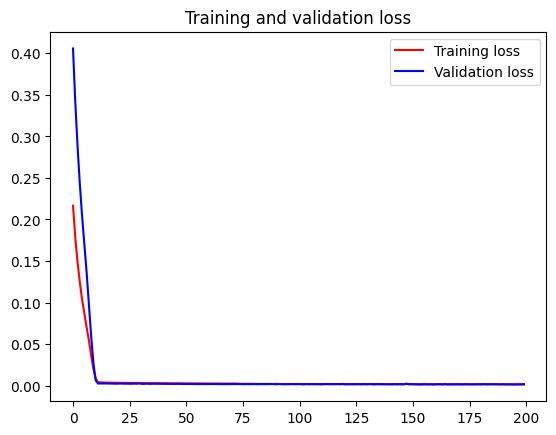

<Figure size 640x480 with 0 Axes>

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


((240, 1), (94, 1))

- # Model Evaluation

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [56]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2302.2704567693304
Train data MSE:  5300449.256112861
Train data MAE:  1743.745556640625
-------------------------------------------------------------------------------------
Test data RMSE:  2389.2006441589187
Test data MSE:  5708279.718049393
Test data MAE:  1854.8915392287233


- ## Variance Regression Score

In [57]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9826942484341731
Test data explained variance regression score: 0.9513889595069921


- ## R square score for regression

In [58]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9819584513925405
Test data R2 score: 0.9428217661042849


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [59]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0008702034717797494
Test data MGD:  0.0006276068842506306
----------------------------------------------------------------------
Train data MPD:  66.43758534593944
Test data MPD:  59.47722496046218


- # Comparision of original Bitcoin close price and predicted close price

In [ ]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (366, 1)
Test predicted data:  (366, 1)


- # Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


- # Plotting last 15 days of dataset and next predicted 30 days

In [62]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [63]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [64]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [65]:
# model.save('Model/model.h5')